Move the cells I used to calculate the tides from "Transport" so just read them in there

In [5]:
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline

In [2]:
u_vel   = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DuGridFields1hV17-02')
iY = 344; iX = 276; iZ = 10 
velocity2015 = u_vel.uVelocity.sel(time ='2015', depth=iZ, gridX=iX, gridY=iY, method='nearest')
velocity2016 = u_vel.uVelocity.sel(time ='2016', depth=iZ, gridX=iX, gridY=iY, method='nearest')
velocity2017 = u_vel.uVelocity.sel(time ='2017', depth=iZ, gridX=iX, gridY=iY, method='nearest')

RuntimeError: NetCDF: DAP failure

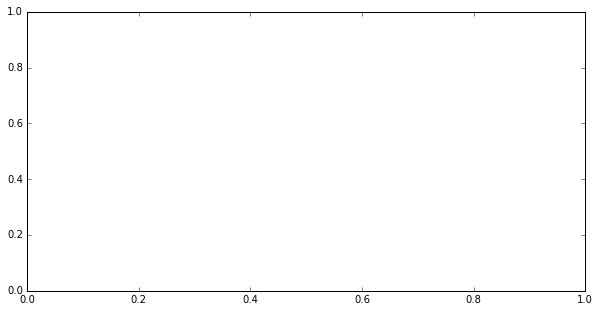

In [6]:
# Yes, do run this.  Its gets the data which makes the next cell happy.
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
velocity2015.plot()
velocity2016.plot()
velocity2017.plot()

In [ ]:
velocity = xr.concat([velocity2015, velocity2016], dim='time')
velsquared = velocity * velocity
day_avg_tide_vel = velsquared.resample('1D', dim='time', how='mean')

In [ ]:
day_avg_tide_pd = day_avg_tide_vel.to_dataframe()
day_avg_tide_pd = day_avg_tide_pd.drop('depth', 1)
day_avg_tide_pd = day_avg_tide_pd.drop('gridY', 1)
day_avg_tide_pd = day_avg_tide_pd.drop('gridX', 1)
day_avg_tide_pd.to_csv('day_avg_tide_pd.csv')

In [ ]:
low_pass_tide = pd.rolling_mean(day_avg_tide_pd, 4, center=True)
low_pass_tide.to_csv('low_pass_tide.csv')
low_pass_tide.plot()